In [1]:
import time
import os

import numpy as np
from diffrax import diffeqsolve, ODETerm, Dopri5, SaveAt, Kvaerno5, Kvaerno4, PIDController, Heun
import jax.numpy as jnp
import jax


import matplotlib.pyplot as plt

from rosenbrock import Rosenbrock23
from rodas5 import Rodas5


t0, t1 = 0., 1
y0 = jnp.array([2., 0.])

rtol = 1e-4
atol = 1e-4

def f(t, y, args):
    return jnp.array([y[1], -y[0]])



N = 10000

stepsize_controller = PIDController(rtol=rtol, atol=atol)
rodas5 = Rodas5()
kv5 = Kvaerno5()
T_end = t1
stepsize = T_end/N
saveat = SaveAt(ts=list(np.arange(0, T_end, stepsize)))
term = ODETerm(f)

rosen = Rosenbrock23()

heun = Heun()


In [2]:

start = time.time()
sol_rodas5 = diffeqsolve(term, rodas5, t0=0, t1=T_end, dt0=stepsize, y0=y0, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=100000)
end = time.time()
print("Rodas5 time: ", end-start)


start = time.time()
sol_kv5 = diffeqsolve(term, kv5, t0=0, t1=T_end, dt0=stepsize, y0=y0, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=100000)
end = time.time()
print("Kvaerno5 time: ", end-start)


start = time.time()
sol_r23 = diffeqsolve(term, rosen, t0=0, t1=T_end, dt0=stepsize, y0=y0, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=100000)
end = time.time()
print("Rosenbrock23 time: ", end-start)

start = time.time()
sol_heun = diffeqsolve(term, heun, t0=0, t1=T_end, dt0=stepsize, y0=y0, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=100000)
end = time.time()
print("Heun time: ", end-start)


Rodas5 time:  0.6163032054901123
Kvaerno5 time:  0.8004581928253174
Rosenbrock23 time:  0.4039289951324463
Heun time:  0.43193984031677246


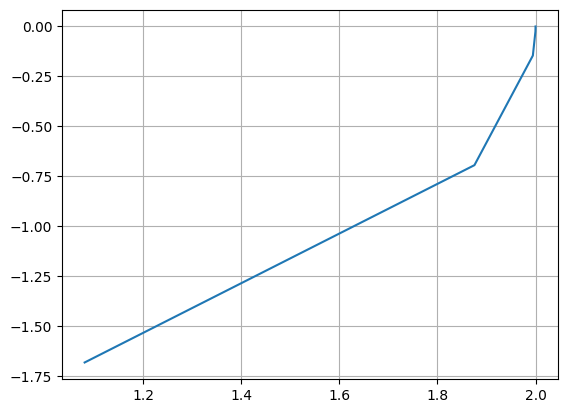

In [3]:

plt.plot(sol_rodas5.ys[:,0], sol_rodas5.ys[:,1])

plt.grid()

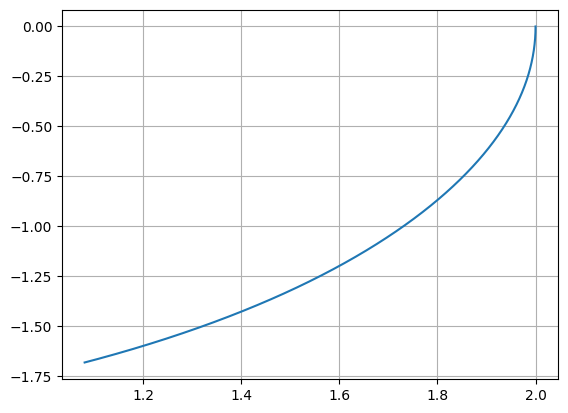

In [4]:
plt.plot(sol_kv5.ys[:,0], sol_kv5.ys[:,1])

plt.grid()

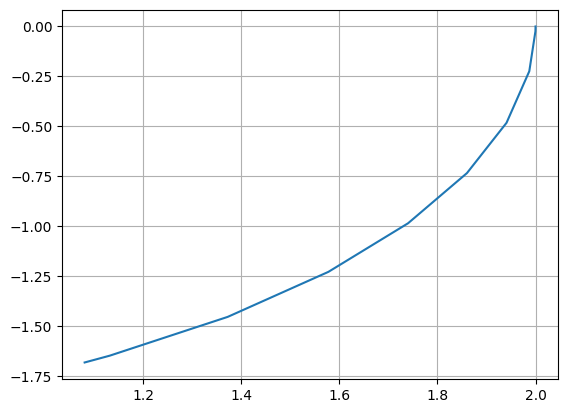

In [5]:
plt.plot(sol_r23.ys[:,0], sol_r23.ys[:,1])

plt.grid()

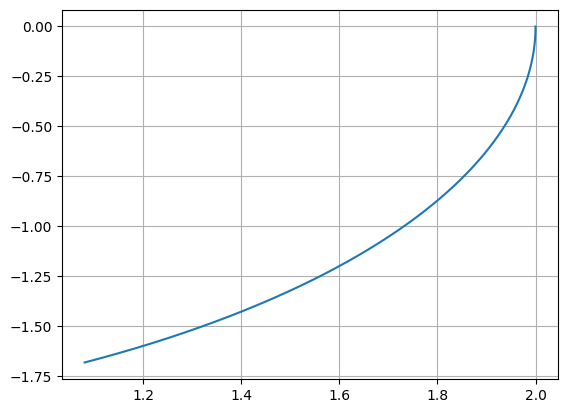

In [6]:
plt.plot(sol_heun.ys[:,0], sol_heun.ys[:,1])

plt.grid()

In [7]:
b1 = -14.09640773051259
b2 = 6.925207756232704
b3 = -41.47510893210728
b4 = 2.343771018586405
b5 = 24.13215229196062
b6 = 1.0
b7 = 1.0
b8 = 1.0


print(b1 + b2 + b3 + b4 +b5+b6+b7+b8)

-19.17038559584015
